In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Wczytanie biblioteki NSS
from nelson_siegel_svensson.calibrate import calibrate_nss_ols
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve

### Wczytanie danych wejściowych: Tenor i Bval - tutaj jest tablica ale z Knime będzie df 
t0 = np.array([0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])
y = np.array([0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.038])

### Docelowo tego elementu nie będzie jak zostaną wczytane wartości w formacie df
df = pd.DataFrame()
df['Tenor'] = t0
df['Bval'] = y

df


,Tenor,Bval
0,0.1,0.010
1,0.5,0.011
2,1.0,0.013
3,2.0,0.016
4,3.0,0.019
5,4.0,0.021
6,5.0,0.026
7,10.0,0.030
8,15.0,0.035
9,20.0,0.037


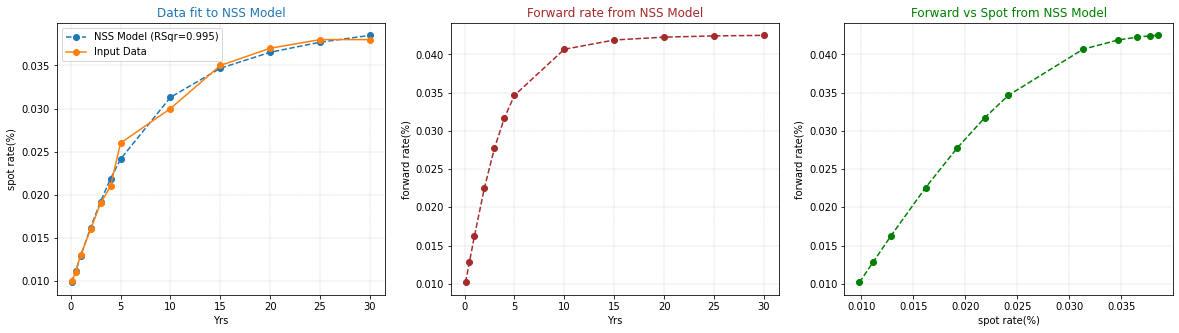

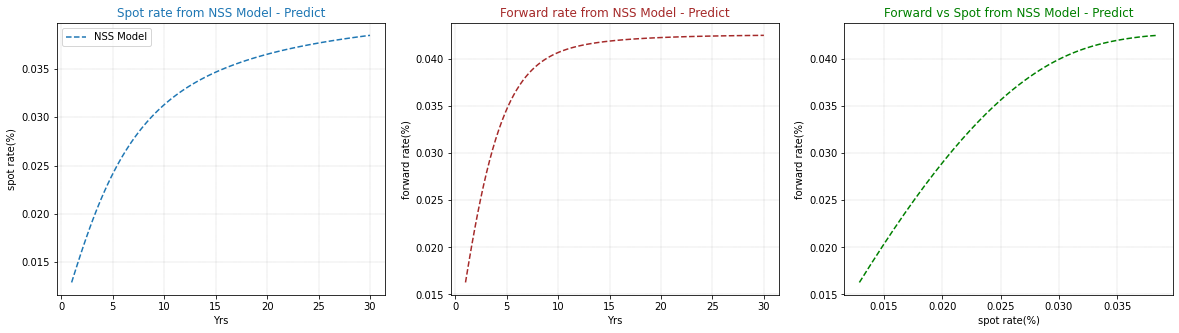

In [5]:
### Fit Model
curve, status = calibrate_nss_ols(np.array(df["Tenor"]), np.array(df["Bval"]))  # , tau0=1.0starting value of 1.0 for the optimization of tau
assert status.success

### Predict Model
curve_s = curve(t0)
curve_f = NelsonSiegelSvenssonCurve.forward(curve,t0)
assert status.success


### Wykres - tylko do celów prezentacyjnych - w samym modelu nie będzie konieczne
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(t0, curve_s, 'o--', label='NSS Model (RSqr=' + str(round(r2_score(y,curve_s),3)) + ')')
plt.plot(t0, y, 'o-', label='Input Data')
plt.title('Data fit to NSS Model', color='tab:blue')
plt.xlabel('Yrs')
plt.ylabel('spot rate(%)')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.1)
plt.legend()

plt.subplot(132)
plt.plot(t0, curve_f, 'o--', label='NSS Model', color='brown')
plt.title('Forward rate from NSS Model', color='brown')
plt.xlabel('Yrs')
plt.ylabel('forward rate(%)')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.1)

plt.subplot(133)
plt.plot(curve_s, curve_f, 'o--', label='NSS Model', color='g')
plt.title('Forward vs Spot from NSS Model', color='g')
plt.xlabel('spot rate(%)')
plt.ylabel('forward rate(%)')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.1)



plt.show()


t1 = np.linspace(1, 30, 100)

### Predict Model
curve_s = curve(t1)
curve_f = NelsonSiegelSvenssonCurve.forward(curve,t1)
assert status.success



### Wykres - tylko do celów prezentacyjnych - w samym modelu nie będzie konieczne
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(t1, curve_s, '--', label='NSS Model')
#plt.plot(t1, y, 'o-', label='Input Data')
plt.title('Spot rate from NSS Model - Predict', color='tab:blue')
plt.xlabel('Yrs')
plt.ylabel('spot rate(%)')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.1)
plt.legend()

plt.subplot(132)
plt.plot(t1, curve_f, '--', label='NSS Model', color='brown')
plt.title('Forward rate from NSS Model - Predict', color='brown')
plt.xlabel('Yrs')
plt.ylabel('forward rate(%)')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.1)

plt.subplot(133)
plt.plot(curve_s, curve_f, '--', label='NSS Model', color='g')
plt.title('Forward vs Spot from NSS Model - Predict', color='g')
plt.xlabel('spot rate(%)')
plt.ylabel('forward rate(%)')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.1)

plt.show()

In [3]:
### Pobranie danych o współczynnikach beta i tau z modelu
my_dict = dict(vars(curve))
df_betavalue = pd.DataFrame(list(my_dict.items()), columns = ['Beta','BetaVal'])

df_betavalue

,Beta,BetaVal
0,beta0,0.042554
1,beta1,-0.033043
2,beta2,-0.018501
3,beta3,-0.003818
4,tau1,2.000000
5,tau2,5.000000
